In [1]:
import numpy as np
# data
X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
])

Y = np.array([
    [18],
    [20],
    [22],
    [25],
    [30]
])

In [2]:
np.random.seed(42)
a1 = np.random.randn(3, 3) * 0.01
b1 = np.zeros((3, 1))

a2 = np.random.randn(1, 3) * 0.01
b2 = np.zeros((1, 1))

In [3]:
def relu(z):
    return np.maximum(0, z)

In [4]:
def relu_derivative(z):
    return (z > 0).astype(float)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [7]:
learning_rate = 0.001
epochs = 1000
losses = []

In [10]:
for epoch in range(epochs):

    # forward prop
    Z1 = np.dot(a1, X.T) + b1        # (3,5)
    A1 = relu(Z1)

    Z2 = np.dot(a2, A1) + b2         # (1,5)
    A2 = sigmoid(Z2)

    # loss
    loss = np.mean((A2.T - Y) ** 2)
    losses.append(loss)

    # back prop
    dA2 = 2 * (A2 - Y.T)
    dZ2 = dA2 * sigmoid_derivative(Z2)

    dW2 = np.dot(dZ2, A1.T) / X.shape[0]
    db2 = np.mean(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(a2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = np.dot(dZ1, X) / X.shape[0]
    db1 = np.mean(dZ1, axis=1, keepdims=True)

    # update
    a1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    a2 -= learning_rate * dW2
    b2 -= learning_rate * db2
print("Final a1:\n", a1)
print("Final b1:\n", b1)
print("Final a2:\n", a2)
print("Final b2:\n", b2)


Final a1:
 [[0.40247294 0.07700533 0.0617832 ]
 [0.37049533 0.0684251  0.04747123]
 [0.42546023 0.0892513  0.0527316 ]]
Final b1:
 [[0.01960251]
 [0.01761917]
 [0.02031347]]
Final a2:
 [[0.41481764 0.38001929 0.43820783]]
Final b2:
 [[0.19656261]]


In [11]:
# predictions
Z1 = np.dot(a1, X.T) + b1
A1 = relu(Z1)
Z2 = np.dot(a2, A1) + b2
predictions = sigmoid(Z2)

print("Predictions:")
print(predictions.T)

Predictions:
[[0.99997659]
 [0.99975615]
 [0.99999979]
 [0.99999781]
 [0.99999998]]


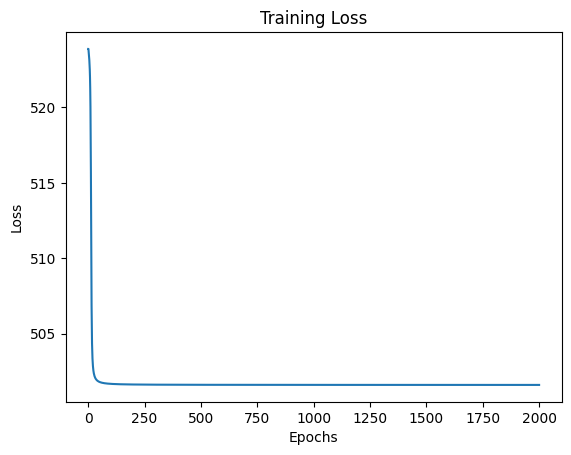

In [12]:
# plot
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()